# Correlation & Dependencies

## Initialization

In [1]:
# Importing verticapy
from verticapy import *
# Creating a connection
new_auto_connection({"host": "10.211.55.14", 
                     "port": "5433", 
                     "database": "testdb", 
                     "password": "XxX", 
                     "user": "dbadmin"},
                    name = "VerticaDSN")
# Set the primary auto-connection
change_auto_connection("VerticaDSN")

In [2]:
verticapy.__version__

'0.6.1'

## Dataset Creation

,AbcnameVarchar(8),123ageInt,AbcsexVarchar(1),123is_studentInt,"123revenuNumeric(6,1)",Abcfav_sportVarchar(10),123heightInt
1,Liam,14,M,1,0.0,Football,0
2,Oliver,32,M,0,2500.0,Football,2
3,William,17,M,1,400.0,Football,1
4,James,40,M,0,5000.0,Basketball,2
5,John,25,M,1,1000.0,Basketball,2
6,Beverly,35,F,0,3500.0,Dance,2
7,Britney,22,F,1,1500.0,Dance,2
8,Amelia,56,F,0,10000.0,Dance,1
9,Sophia,18,F,1,2000.0,Basketball,0
10,Benjamin,22,M,0,3000.0,Dance,0

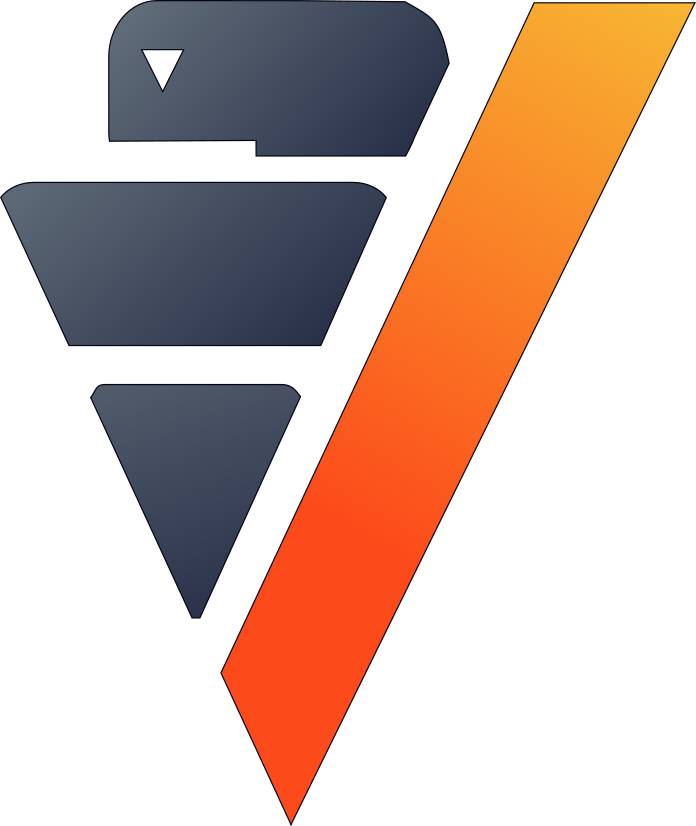

In [3]:
# Dataset of many people information:
#  - name
#  - sex
#  - age
#  - is_student: 1 if he/she is a student, 0 otherwise
#  - revenu
#  - fav_sport: Favorite Sport
#  - height: 0 if 145 < height < 155 ; 0 if 155 <= height < 165 ; 0 if height >= 165; 
from verticapy import *
people = {"name": ["Liam", 
                   "Oliver", 
                   "William", 
                   "James", 
                   "John", 
                   "Beverly", 
                   "Britney",
                   "Amelia",
                   "Sophia",
                   "Benjamin",
                   "Ethan",
                   "Celine"],
          "age": [14, 32, 17, 40, 25, 35, 22, 56, 18, 22, 25, 25],
          "sex": ["M", "M", "M", "M", "M", "F", "F", "F", "F", "M", "M", "F"],
          "is_student": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
          "revenu": [0.0, 2500.0, 400.0, 5000.0, 1000.0, 3500.0, 1500.0, 10000.0, 2000.0, 3000.0, 1500.0, 1200.0],
          "fav_sport": ["Football", 
                        "Football", 
                        "Football", 
                        "Basketball", 
                        "Basketball",
                        "Dance",
                        "Dance",
                        "Dance",
                        "Basketball",
                        "Dance",
                        "Football",
                        "Football"],
          "height": [0, 2, 1, 2, 2, 2, 2, 1, 0, 0, 1, 1]}
people = tablesample(people).to_vdf()
people

## Correlations

### age vs revenu - Pearson

<AxesSubplot:xlabel='"age"', ylabel='"revenu"'>

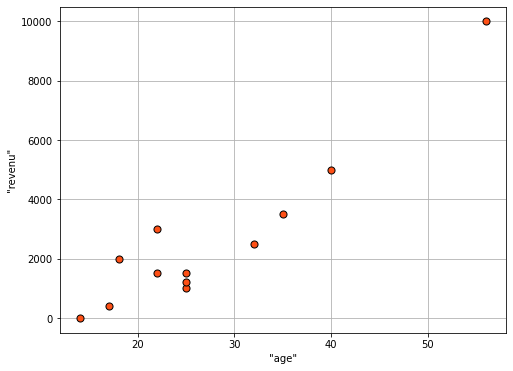

In [4]:
# scatter plot to analyse the link between variables
# Linear link is easily noticeable
people.scatter(["age", "revenu"])

In [5]:
people.corr_pvalue("age", "revenu", method="pearson")

(0.934263518449188, 8.651604668455931e-06)

### age vs height - Pearson / Spearman / Kendall

<AxesSubplot:xlabel='"age"', ylabel='"height"'>

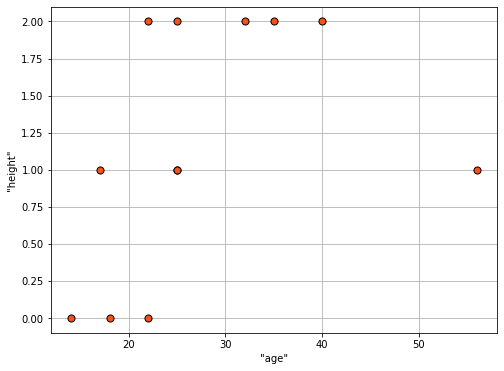

In [6]:
# scatter plot to analyse the link between variables
# we got an ordinal variable = many ties
people.scatter(["age", "height"])

In [7]:
# Linear Correlation will not work well
people.corr_pvalue("age", "height", method="pearson")

(0.417112419222274, 0.17733241785525716)

In [8]:
# Spearman can handle it
people.corr_pvalue("age", "height", method="spearman")

(0.577689954419588, 0.05483276682470973)

In [9]:
# Kendall is the most robust one
people.corr_pvalue("age", "height", method="kendall")

(0.481646683572972, 0.0527617087765731)

### sex vs fav_sport - Cramer's V

<AxesSubplot:xlabel='Density', ylabel='"sex"'>

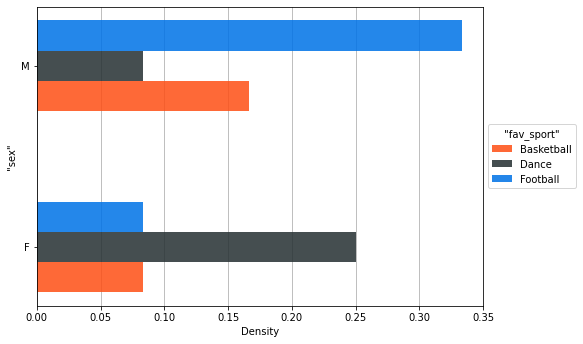

In [10]:
# bar chart to analyse the link between variables
people.bar(["sex", "fav_sport"])

In [11]:
# Cramer's V is the correlation function to use when
# dealing with categorical variables.
people.corr_pvalue("age", "height", method="cramer")

(0.6831300510639732, 0.3986517641267601)

### is_student vs (age, revenu) - Biserial Point

<AxesSubplot:xlabel='AVG("is_student")', ylabel='"age"'>

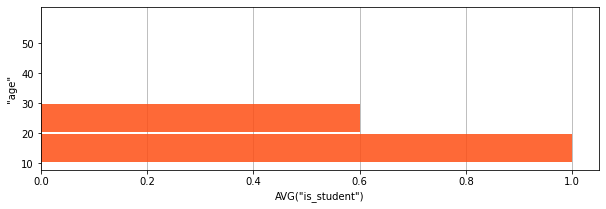

In [12]:
# bar chart to analyse the link between variables
people["age"].bar(method="avg", of="is_student")

In [13]:
people.corr_pvalue("age", "is_student", method="biserial")

(-0.633666116458354, 0.02693878642336842)

<AxesSubplot:xlabel='AVG("is_student")', ylabel='"revenu"'>

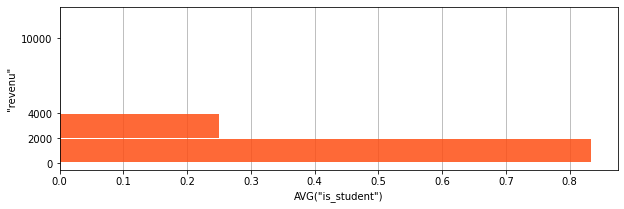

In [14]:
people["revenu"].bar(method="avg", of="is_student")

In [15]:
people.corr_pvalue("revenu", "is_student", method="biserial")

(-0.579536689406573, 0.04827738208155651)

## p-value

In [16]:
# Having a high correlation doesn't mean anything if the p-value
# is high. As name has too many categories, cramer's V will 
# overestimate the links. We need to reject the coefficient
people.corr_pvalue("name", "fav_sport", method="cramer")

(0.8207381501496754, 0.33426264511362525)

In [17]:
people.corr_pvalue("name", "sex", method="cramer")

(0.7168604389202189, 0.3391162411698932)

In [18]:
people.corr_pvalue("name", "age", method="cramer")

(0.9446486707295528, 0.25392195580552407)

In [19]:
# Pearson coefficient does not work well for variables having
# ties. Besides it can only help understanding linear links.
people.corr_pvalue("age", "height", method="pearson")

(0.417112419222274, 0.17733241785525716)

In [20]:
# In this example, we can suspect with a very high probability
# a correlation between the age and the revenues! But it is
# probably not causal!
people.corr_pvalue("age", "revenu", method="pearson")

(0.934263518449188, 8.651604668455931e-06)